In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, confusion_matrix, fbeta_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

In [3]:
X_train = pd.read_csv('./model_csv/X_train_Kickstarter.csv')
X_test = pd.read_csv('./model_csv/X_test_Kickstarter.csv')
y_train = pd.read_csv('./model_csv/y_train_Kickstarter.csv')
y_test = pd.read_csv('./model_csv/y_test_Kickstarter.csv')
y_train = y_train['state']
y_test = y_test['state']

In [33]:
RSEED=42

# Dummy Classifier

In [4]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')

In [5]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [6]:
y_pred = dummy_clf.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



<AxesSubplot:>

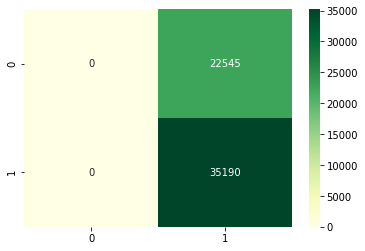

In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, fmt = "g", cmap='YlGn')


# KNN Classifier

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=2)

In [12]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
y_pred_knn = knn_clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.47      0.51     22545
           1       0.69      0.76      0.72     35190

    accuracy                           0.65     57735
   macro avg       0.62      0.61      0.62     57735
weighted avg       0.64      0.65      0.64     57735



<AxesSubplot:>

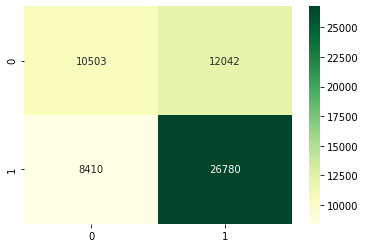

In [23]:
confm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confm_knn, annot = True, fmt = "g", cmap='YlGn')

# SGDClassifier

In [59]:
sgd_clf = SGDClassifier(loss='hinge', max_iter=1000, alpha=0.0001, random_state=RSEED)
#sgd_clf = SGDClassifier(alpha=0.01, loss='log', penalty='l2', max_iter=1000, random_state=RSEED)

In [60]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [61]:
y_pred_sgd = sgd_clf.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     22545
           1       0.68      0.68      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



<AxesSubplot:>

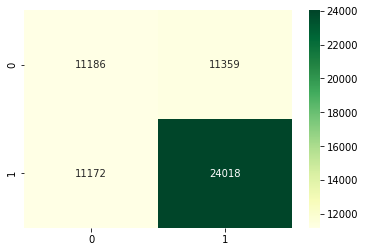

In [63]:
confm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(confm_sgd, annot = True, fmt = "g", cmap='YlGn')

## SGD Classifier - GridSearch

In [35]:
sgd_rs_clf = SGDClassifier(max_iter=1000, random_state=RSEED)

In [41]:
param_grid = {"loss" : ["hinge", "log"],
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "elasticnet"]
             }

In [43]:
gs = GridSearchCV(sgd_rs_clf, param_grid, scoring='accuracy', cv=5, verbose=5, n_jobs=-1)

In [44]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log'],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy', verbose=5)

In [45]:
# Best score
print('Best score:', round(gs.best_score_, 3))
# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.629
Best parameters: {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}


In [48]:
y_pred_gs = gs.best_estimator_.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     22545
           1       0.68      0.69      0.68     35190

    accuracy                           0.61     57735
   macro avg       0.59      0.59      0.59     57735
weighted avg       0.61      0.61      0.61     57735



<AxesSubplot:>

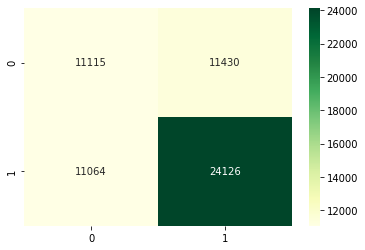

In [50]:
confm_sgd = confusion_matrix(y_test, y_pred_gs)
sns.heatmap(confm_sgd, annot = True, fmt = "g", cmap='YlGn')